# Linkedin Account Data Analysis

Lets set-up the required libraries

In [2]:
import jovian
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image 

We will be using my linkedin connection data 2 years 4 months (from Jan 2020 to May 2022), for this analysis project. 

To downlaod your Linkedin account data, you will need to follow the following steps-
1. Click the ‘Me’ dropdown menu in the upper right-hand side of your LinkedIn navigation bar.
2. Click ‘Settings & Privacy.’

Linkedin will share your connection data within in 10 min. However to deliver complete data (connections, messages, shares, like, votes and more) it takes 48 hours.

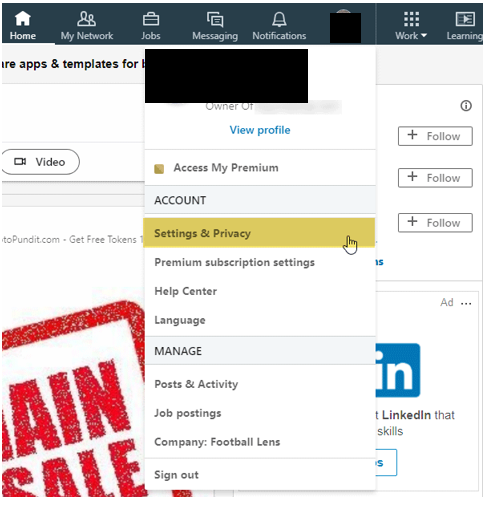

In [2]:
img1 = Image.open('img11.PNG')
img2 = Image.open('img2.jpg')
img3 = Image.open('img33.png')
img1.show()

3. Click the ‘Privacy’ tab.
4. Scroll down to ‘Download your data’ which is under the ‘How LinkedIn uses your data’ section.
5. Click ‘Get a copy of your data.’

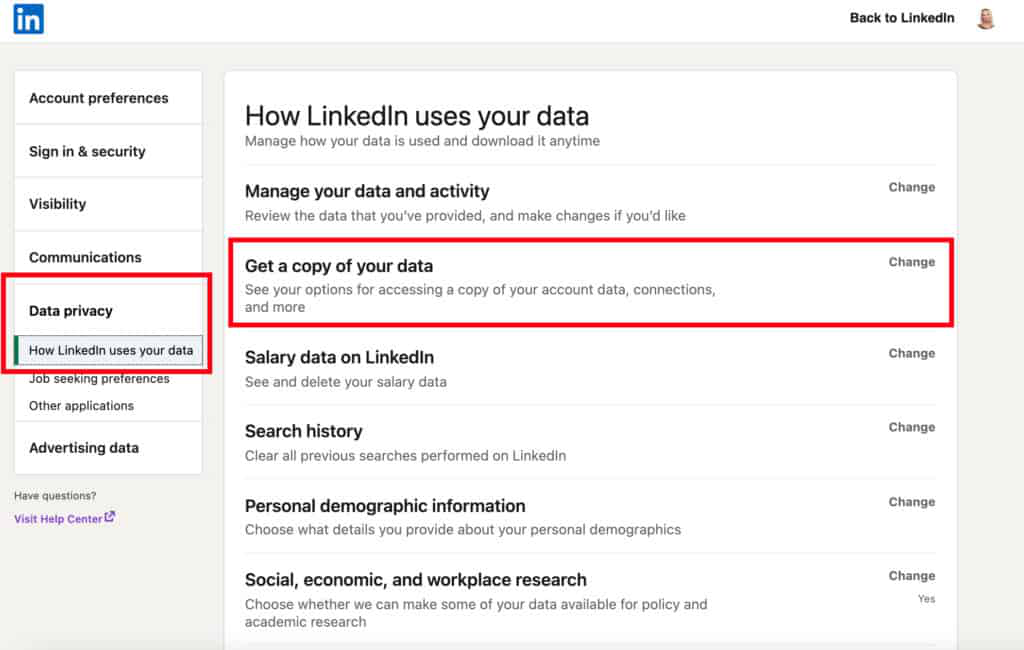

In [3]:
img2.show()

6. Select the data (in this case, ‘Connections’) you’d like to export. Click ‘Request archive.’
7. Click the ‘download it with this link’ prompt in your notification email.
8. Click ‘Download archive.’
9. Open your .CSV file to access your data.

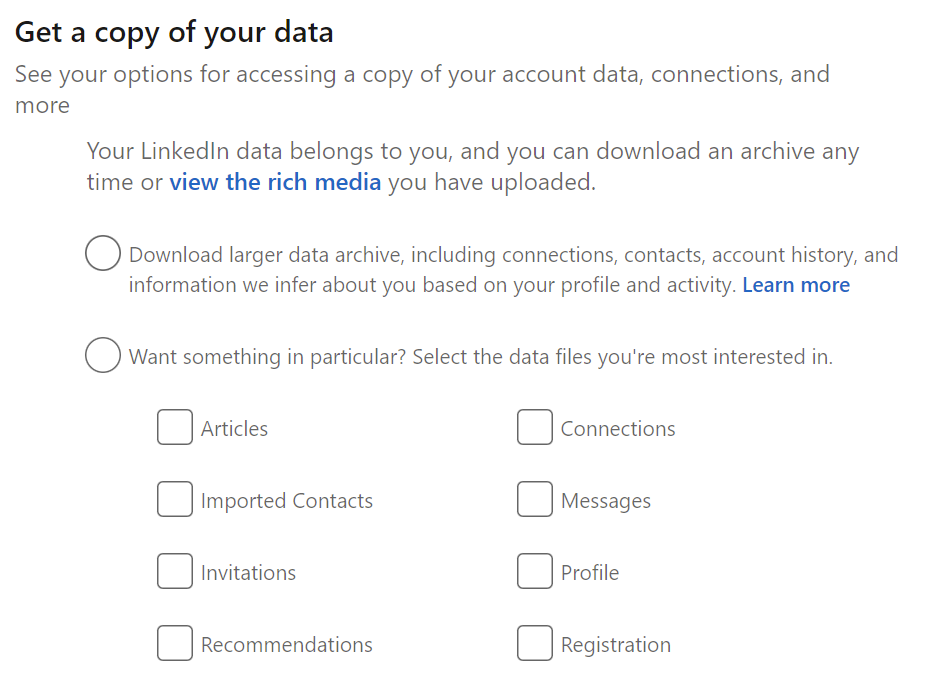

In [4]:
img3.show()

In [5]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "arjunarjun7522/my-linkedin-account-data-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/arjunarjun7522/my-linkedin-account-data-analysis


'https://jovian.ai/arjunarjun7522/my-linkedin-account-data-analysis'

Now that we have our data we will read it and know more about the data.

In [3]:
df = pd.read_csv('Connections.csv')
df

,First Name,Last Name,Company,Position,Date
0,Manikandan,MP,Wells Fargo,Senior Analyst,29-May-22
1,Tabassum,Momin,State Street HCL service,Senior Analyst,29-May-22
2,Jahnavi,Joshi,NielsenIQ,Research Analyst,29-May-22
3,Aditi,Singh,AIESEC,Data Manager,29-May-22
4,Akshaya,siva,State Street HCL services (India) Private limited,Senior Analyst,28-May-22
...,...,...,...,...,...
1795,Dr. Prabodh,Gour,KHANDELWAL COLLEGE OF MANAGEMENT SCIENCE AND T...,Head of Department,14-Feb-20
1796,Shubhi,Rastogi,NIIT Limited,E-learning,04-Feb-20
1797,sharmeen,zehra,HCL Healthcare India,Care Coordinator,26-Jan-20
1798,Virender,Sachan,NaN,NaN,16-Jan-20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   First Name  1775 non-null   object
 1   Last Name   1775 non-null   object
 2   Company     1669 non-null   object
 3   Position    1669 non-null   object
 4   Date        1800 non-null   object
dtypes: object(5)
memory usage: 70.4+ KB


So the first issue with data is missing  values in 4 columns. Having Company and position null means they might be students, or people have not added their experience to the profile. But having first and last name null might be because of detection error. Also we can see the number od null in thses two is same 25. So we will remove the rows having first and last name null, and fill the null in company and position columns with "Not defined".

In [5]:
new_df = df ## creating a copy of data

In [6]:
new_df.shape

(1800, 5)

In [7]:
new_df.dropna(subset = ['First Name','Last Name'],inplace=True) ## drop the null values

In [8]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1775 entries, 0 to 1799
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   First Name  1775 non-null   object
 1   Last Name   1775 non-null   object
 2   Company     1669 non-null   object
 3   Position    1669 non-null   object
 4   Date        1775 non-null   object
dtypes: object(5)
memory usage: 83.2+ KB


Now we need to fill na in the Company and position column.

In [9]:
new_df.Company = new_df.Company.fillna('Not defined')
new_df.Position = new_df.Position.fillna('Not defined')

new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1775 entries, 0 to 1799
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   First Name  1775 non-null   object
 1   Last Name   1775 non-null   object
 2   Company     1775 non-null   object
 3   Position    1775 non-null   object
 4   Date        1775 non-null   object
dtypes: object(5)
memory usage: 83.2+ KB


Now we have same number of rows with non-null values in each column. But still we need to fix one thing. You can see that the Data type of Date is Object, so we will correct it by coverting to datetime type.

In [10]:
new_df.Date=pd.to_datetime(df.Date) ## converted data type to datetime type
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1775 entries, 0 to 1799
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   First Name  1775 non-null   object        
 1   Last Name   1775 non-null   object        
 2   Company     1775 non-null   object        
 3   Position    1775 non-null   object        
 4   Date        1775 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 83.2+ KB


Now we are done with Data cleaning and manipulating the Data. Lets see the questions we will answer with the help of data.

1. Top 10 companies by number of employees in my connection network.
2. Top 10 positions by number of professionals in my connection network.
3. The trend of connections in my network by year.
4. The distribution of connection by month
5. The distribution of connection by weekday

In [83]:
#1. Top 10 companies by number of employees in my connection network.

company_data = new_df.Company.value_counts() ##this function gives result in descending order so we dont sort it.
company_data.head(10)

Not defined                                   106
Google                                         23
Accenture                                      23
Elets Technomedia                              21
Tata AIG General Insurance Company Limited     20
Tata Consultancy Services                      20
Capgemini                                      18
Infosys                                        18
Amazon                                         15
HCL Technologies                               13
Name: Company, dtype: int64

We will include the "not defined" in this insight, and lets plot a graph.

In [84]:
company_data = company_data[1:11] ##indexing
company_data

Google                                        23
Accenture                                     23
Elets Technomedia                             21
Tata AIG General Insurance Company Limited    20
Tata Consultancy Services                     20
Capgemini                                     18
Infosys                                       18
Amazon                                        15
HCL Technologies                              13
PNB MetLife India Insurance Co. Ltd           10
Name: Company, dtype: int64

In [85]:
lb = company_data.index
values = company_data.values

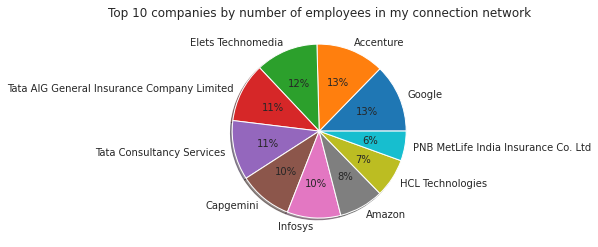

Google : 13%
Accenture : 13%
Elets Technomedia : 12%
Tata AIG General Insurance Company Limited : 11%
Tata Consultancy Services : 11%
Capgemini : 10%
Infosys : 10%
Amazon : 8%
HCL Technologies : 7%
PNB MetLife India Insurance Co. Ltd : 6%


In [86]:
##plotting the graph
plt.pie(values,labels = lb,autopct='%0.0f%%',shadow = True)
plt.title('Top 10 companies by number of employees in my connection network')
plt.show()

dic1 = {}
for i,b in zip(values,lb):
    a = (int(i)*100)/values.sum()
    a = round(a)
    dic1[b] = a
   
for key, value in dic1.items():
    print(key, ':', str(value)+'%')

As per above graph, I have maximum number of Google and Accenture employees in connection network

In [ ]:
#Top 10 positions by number of professionals in my connection network.

positions_data = new_df.Position.value_counts()
positions_data.head(10)

Again, we will include not the "not defined" in this insight, and we will plot a do-nut chart this time.

In [88]:
positions_data = positions_data[1:11]
positions_data

Senior Analyst                   52
Chief Executive Officer          32
Data Analyst                     25
Managing Director                23
Business Analyst                 22
Human Resources Executive        20
Assistant Manager                19
Software Engineer                18
Talent Acquisition Specialist    17
Technical Recruiter              14
Name: Position, dtype: int64

In [89]:
values = positions_data.values
lb = positions_data.index

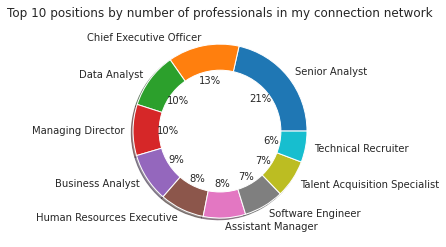

Senior Analyst : 21%
Chief Executive Officer : 13%
Data Analyst : 10%
Managing Director : 10%
Business Analyst : 9%
Human Resources Executive : 8%
Assistant Manager : 8%
Software Engineer : 7%
Talent Acquisition Specialist : 7%
Technical Recruiter : 6%


In [90]:
##plotting the graph
plt.pie(values,labels = lb,autopct='%0.0f%%',shadow = True)
plt.title('Top 10 positions by number of professionals in my connection network')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

dic1 = {}
for i,b in zip(values,lb):
    a = (int(i)*100)/values.sum()
    a = round(a)
    dic1[b] = a
   
for key, value in dic1.items():
    print(key, ':', str(value)+'%')

As per above insight, most people are Senior Analysts in my connection network

In [91]:
#The trend of connections in my network by year.

new_df['Year'] = new_df.Date.dt.year ## creating a new column
year_data = new_df.Year.value_counts()
year_data = year_data.sort_index()
yy= year_data.index
vv = year_data.values

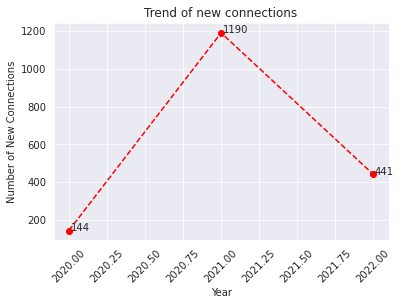

Year    Numer of New Connections


2020     144
2021    1190
2022     441
Name: Year, dtype: int64

In [125]:
##plotting the graph
sns.set_style('darkgrid')
plt.plot(yy,vv,'o--r')
plt.xticks(rotation=45)
plt.title('Trend of new connections')
for i, j in zip(yy, vv):
   plt.text(i+0.01, j+0.5, '{}'.format(j))
plt.xlabel('Year')
plt.ylabel('Number of New Connections')

plt.show()

print('Year','   Numer of New Connections')
year_data

The trend shows I got highest number of new connection in, 2021. This is mainly because we have complete data of 2021, and also my job in 2021 was a database handling and marketing role.So i got huge number of new connections.

In [123]:
#The number of new connection by month

new_df['Month'] = new_df.Date.dt.month
month_data = new_df.Month.value_counts()
month_data = month_data.sort_index()
month_data

1     128
2     196
3     186
4     265
5     367
6     153
7      98
8     122
9      79
10     63
11     86
12     32
Name: Month, dtype: int64

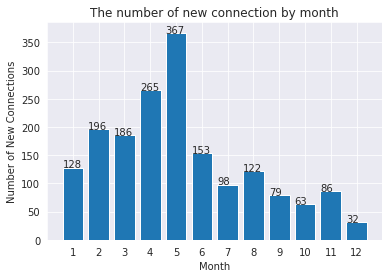

In [157]:
## Plotting the graph

mm = month_data.index
vv = month_data.values
plt.bar(mm,vv)
plt.xticks(mm)
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i+0.6,y[i],y[i])
addlabels(mm,vv)
plt.title('The number of new connection by month')
plt.xlabel('Month')
plt.ylabel('Number of New Connections')
plt.show()


So in all 3 years (2020,2021,2022),  got highest number new connection in month 5 means May, till now.

In [158]:
#The number of new connection by week day

new_df['Day'] = new_df.Date.dt.weekday
day_data = new_df.Day.value_counts()
day_data = day_data.sort_index()
day_data

0    276
1    289
2    300
3    242
4    279
5    195
6    194
Name: Day, dtype: int64

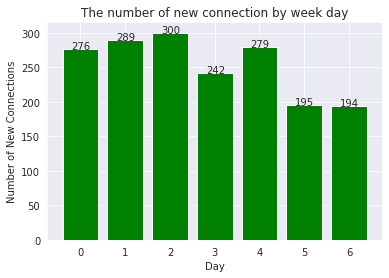

In [163]:
## Plotting the graph

mm = day_data.index
vv = day_data.values
plt.bar(mm,vv, color='g')
plt.xticks(mm)
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i-0.2,y[i],y[i])
addlabels(mm,vv)
plt.title('The number of new connection by week day')
plt.xlabel('Day')
plt.ylabel('Number of New Connections')
plt.show()

So in all 3 years (2020,2021,2022),  got highest number new connection in Day 3  means Tuesday, till now.

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>